In [47]:
import pandas as pd
import numpy as np

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
import streamlit as st
import joblib

In [50]:
import sklearn

In [51]:
df1=pd.read_csv("Crop_rec.csv")
df=df1.copy()

In [52]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [53]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [54]:
# target variable is lable

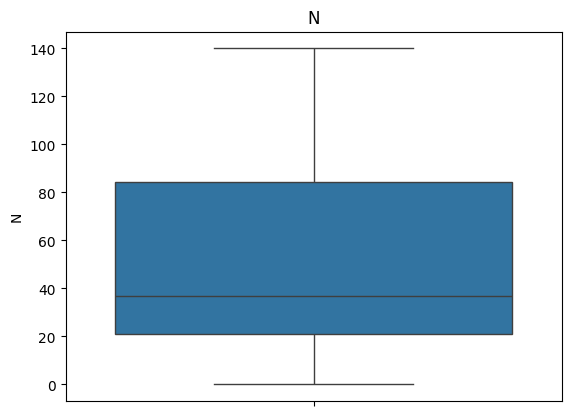

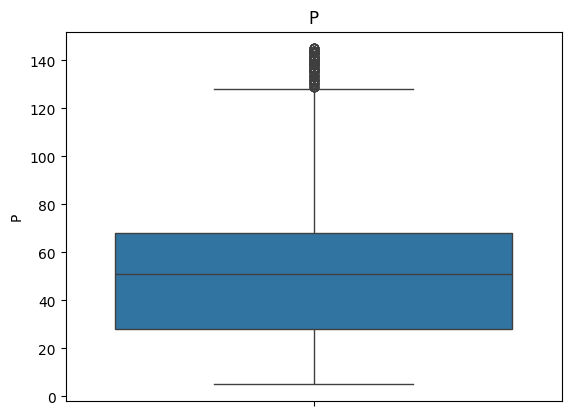

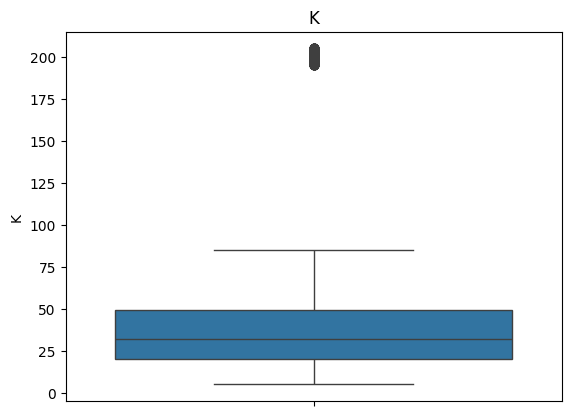

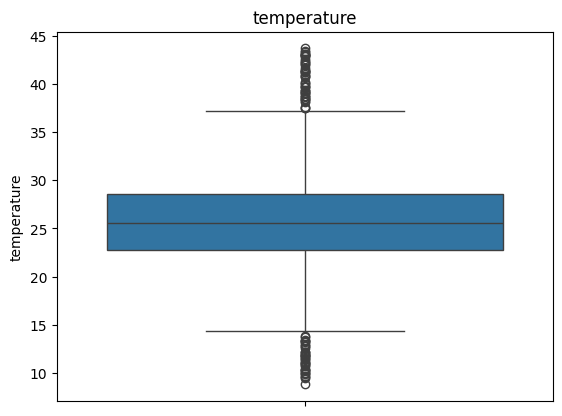

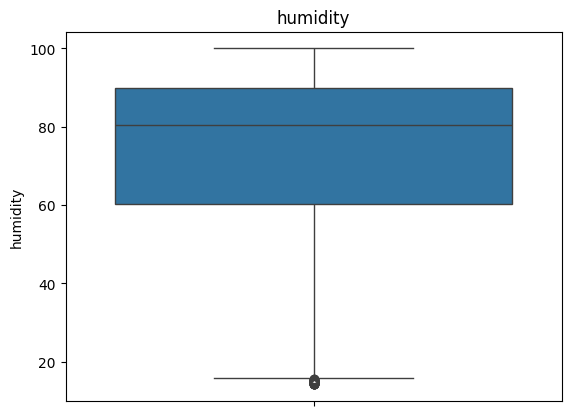

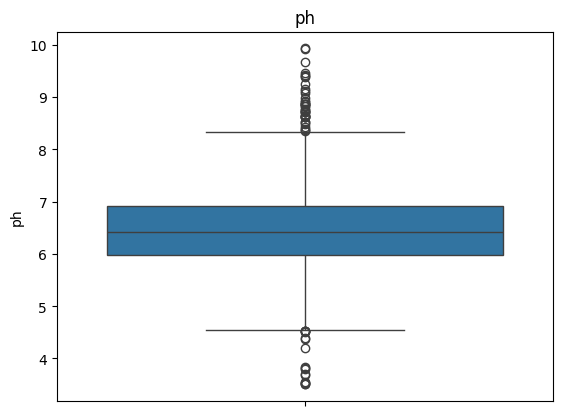

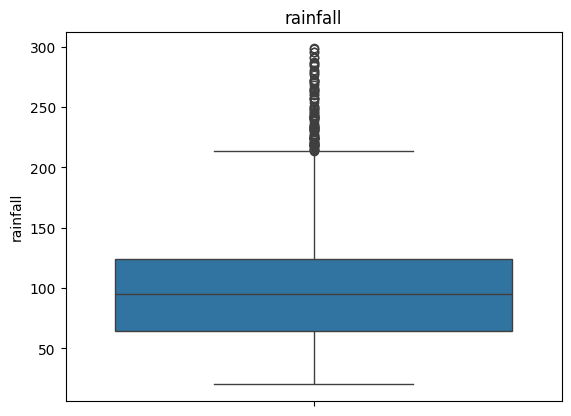

In [55]:
for i in df.select_dtypes(include="number"):
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [56]:
# out lets in 
l=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
# find the ul and ll
def out(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    return ll , ul

In [57]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [58]:
for i in l:
    ll,ul = out(df[i])
    df[i]=np.where(df[i]<ll , ll,df[i])
    df[i]=np.where (df[i]>ul,ul,df[i])

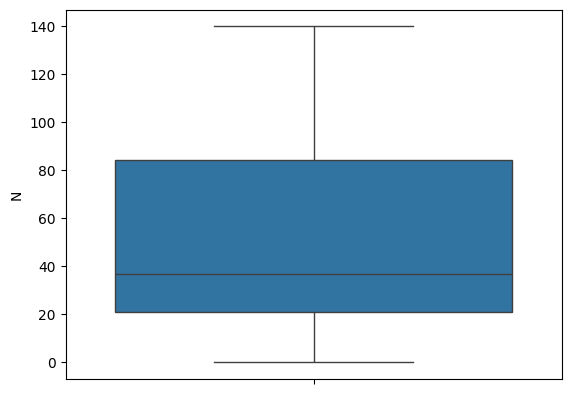

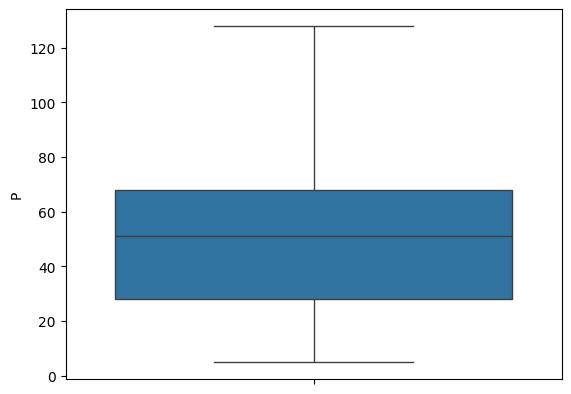

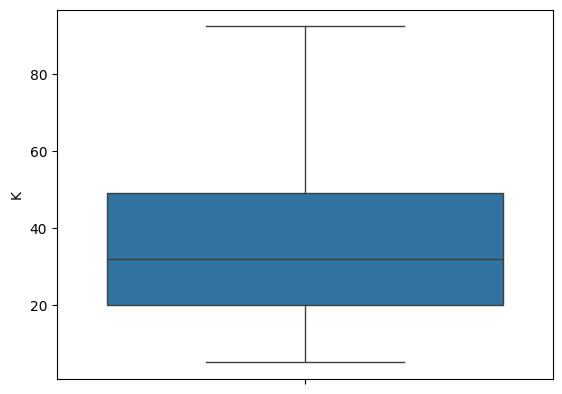

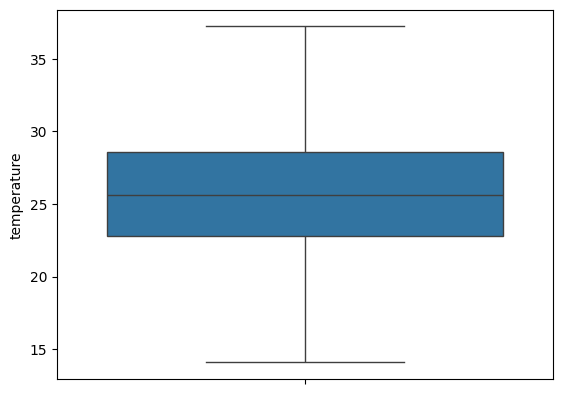

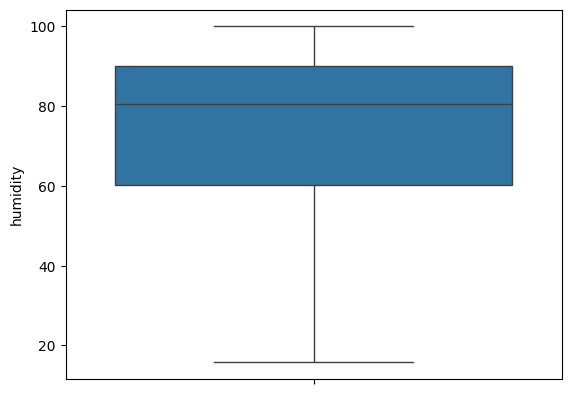

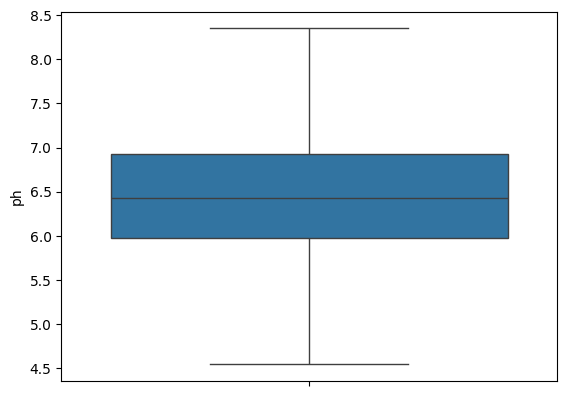

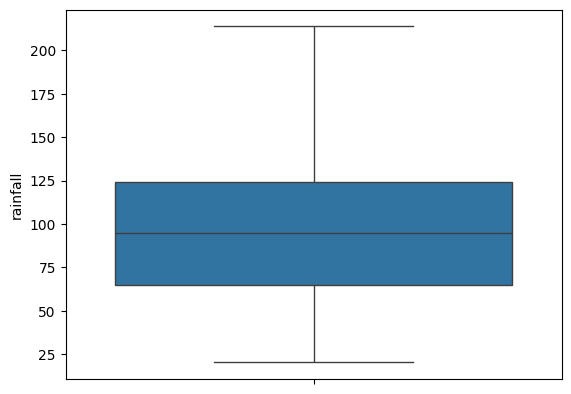

In [59]:
for i in df.select_dtypes(include="number"):
    sns.boxplot(df[i])
    plt.show()

In [60]:
# change the charecter to numarical data
df.head

<bound method NDFrame.head of           N     P     K  temperature   humidity        ph    rainfall   label
0      90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536    rice
1      85.0  58.0  41.0    21.770462  80.319644  7.038096  213.841241    rice
2      60.0  55.0  44.0    23.004459  82.320763  7.840207  213.841241    rice
3      74.0  35.0  40.0    26.491096  80.158363  6.980401  213.841241    rice
4      78.0  42.0  42.0    20.130175  81.604873  7.628473  213.841241    rice
...     ...   ...   ...          ...        ...       ...         ...     ...
2195  107.0  34.0  32.0    26.774637  66.413269  6.780064  177.774507  coffee
2196   99.0  15.0  27.0    27.417112  56.636362  6.086922  127.924610  coffee
2197  118.0  33.0  30.0    24.131797  67.225123  6.362608  173.322839  coffee
2198  117.0  32.0  34.0    26.272418  52.127394  6.758793  127.175293  coffee
2199  104.0  18.0  30.0    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [61]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["label"]=lb.fit_transform(df["label"])

In [63]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,213.841241,20
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,213.841241,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,213.841241,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,213.841241,20


In [64]:
from sklearn.model_selection import train_test_split

In [67]:
x=df.iloc[:,:-1]
y=df["label"]

In [68]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [69]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,213.841241
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,213.841241
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,213.841241
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,213.841241
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [98]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [99]:
from sklearn.preprocessing import MinMaxScaler
nor=MinMaxScaler()
new_x_train=nor.fit_transform(x_train)

In [100]:
new_x_test= nor.transform(x_test)

In [101]:
new_x_train

array([[0.12142857, 0.08943089, 0.10285714, ..., 0.90741433, 0.54671227,
        0.42683288],
       [0.26428571, 0.60162602, 0.16      , ..., 0.63639219, 0.68285498,
        0.25350661],
       [0.05      , 0.55284553, 0.22857143, ..., 0.56261534, 0.720702  ,
        0.12842796],
       ...,
       [0.07857143, 0.25203252, 0.29714286, ..., 0.42786788, 0.50729598,
        0.41295249],
       [0.07857143, 0.96747967, 1.        , ..., 0.76361423, 0.47727648,
        0.26380037],
       [0.22857143, 0.59349593, 0.19428571, ..., 0.55339782, 0.64690107,
        0.17081269]])

In [102]:
# new_x_test , new _x_train  y_train , y_test

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_2=KNeighborsClassifier()
knn_2.fit(new_x_train,y_train)

KNeighborsClassifier()

In [106]:
y_pred=knn_2.predict(new_x_test)

In [107]:
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18,  8, 19, 10,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4,  8,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [151]:
joblib.dump(knn_2,"knn_2.pkl")

['knn_2.pkl']

In [85]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score, recall_score ,f1_score

In [127]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cm)
ac=accuracy_score(y_test,y_pred)
print("accuracy score",ac)
pc=precision_score(y_test,y_pred,average='weighted')
print("pression score",pc)
rs=recall_score(y_test,y_pred,average="weighted")
print("recall score",rs)
f1=f1_score(y_pred,y_test,average="weighted")
print("f1_score",f1)

confusion matrix
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [128]:
# dession tree


In [140]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(new_x_train,y_train)

DecisionTreeClassifier()

In [142]:
y_dpred = dc.predict(new_x_test)

In [144]:
print(y_dpred)


[15 21 17 17  0 12  0 13 14 10  2  4 19  8  4 19  0 11 17 15  5 17 16 17
  3  8 14 16 18 20 19 13  8 10  8  2  8  3  3  9 17 12  2 11 14 11 18  4
 15 11  2  5  7 14  5  9  6  0  1  2 21  4 10 16 17 18 16 20 15 18 15  4
  8  1  2 17  1  6 21 16  5  3 20 13 16 12  5 13  2 19 11 13  6 17 18 13
  9  5  2 10  4 20 16 15 21  9 21  1 18 13  1  8  6 19 18  3 11  4 19 20
 18  7  2  4  3  2  4 11  1 13  1  9 19  3  4 16 18  1  1  0  9 15 14 13
  4 11  0  4  9  2 14 10 21 14 18 18 18  9 11  8  3  0 16  6 20  4  7 10
 21  7  7  2 19  3  4 11 10  7 21  8  5  5  9  8 13  9  1  9  4 17 17 14
 12 19 21  9 11  0  2  3  7  7  1  6 20 19 14  1  8 14 11  3  3  3  0 20
  9 17  5  2  9 12 12  4 17  0  3 19  3 15  0 15 15 12 12  6  4 19 20 15
  5 17 13 11 12 15 18 14  5  7  4  6 18 20  0 19  5  3  6  8 12  1 17  0
  3 20 18 13 14  8 19  7 13  8 11  4 11  3  1  8  4  8 12 15  0  1 18  2
 16  3 21  1  0  3  5 18 16  0  4 17 21 13 17  3 19  3 17 10  0 19  3 12
  3 19 21  9 14 15 21  9 15 12  8  2  3  1  2 18 17

In [147]:
cm1=confusion_matrix(y_test,y_dpred)
print("confusion matrix\n",cm1)
ac1=accuracy_score(y_test,y_dpred)
print("accuracy score",ac1)
pc1=precision_score(y_test,y_dpred,average='weighted')
print("pression score",pc1)
rs1=recall_score(y_test,y_dpred,average="weighted")
print("recall score",rs1)
f11=f1_score(y_dpred,y_test,average="weighted")
print("f11_score",f11)

confusion matrix
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [150]:
joblib.dump(dc,"des.pkl")

['des.pkl']

In [152]:
import streamlit